# Example of plot deco

This is an example of how to set a user defined plot decoration.

The default matplotlib decoration dictionary is defined in postel.deco_default as decoDefault.

[0.         0.2        0.40000001 0.60000002 0.80000001 1.
 1.20000005 1.39999998 1.60000002 1.79999995 2.         2.20000005
 2.4000001  2.5999999  2.79999995 3.         3.20000005 3.4000001
 3.5999999  3.79999995 4.        ]


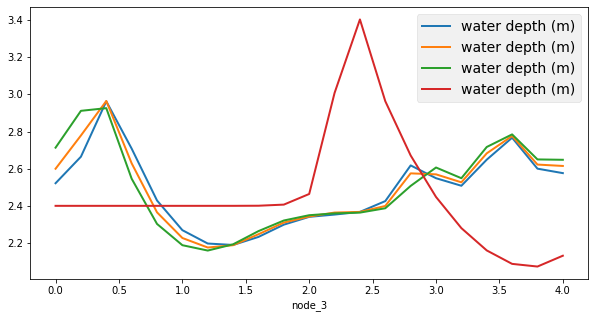

In [1]:
from os import chdir, environ, path
import matplotlib.pyplot as plt
from postel.plot1d import plot1d
from data_manip.extraction.telemac_file import TelemacFile
from postel.deco_default import decoDefault

chdir(path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'gouttedo'))
res = TelemacFile('f2d_gouttedo.slf')

# Getting array of time values from file 
times = res.times

print(times)

# List of nodes we what to display
nodes = [2400, 2401, 2402, 3]

# Getting water depth values over time for each node in nodes
data = res.get_timeseries_on_nodes('WATER DEPTH', nodes)

#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))

#Setting deco dict
decoUser = {'axes.grid': True,
            'font.size': 14.0,
            'font.serif': 'Times'}
plt.style.use('bmh')
plt.rcParams.update(decoUser)

# for each plot adding a history plot with a label node_(node_number)
for i, node in enumerate(nodes):
     plot1d(ax, times, data[i,:], 'water depth (m)', 'node_{}'.format(node))

# Displaying legend
ax.legend()

#Showing figure
plt.show()

del plt
del res